In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [2]:
X,y = load_diabetes(return_X_y=True)

In [5]:
print(load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 ,random_state=45)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr =LinearRegression()

In [9]:
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred = lr.predict(X_test)

In [11]:
from sklearn.metrics import r2_score , mean_squared_error

print("R2 Score", r2_score(y_test,y_pred))
print("RMSE Score" , np.sqrt(mean_squared_error(y_test , y_pred)))

R2 Score 0.5188118914964637
RMSE Score 48.72710829141399


In [41]:
from sklearn.linear_model import Ridge
R = Ridge(alpha = 0.0001)

In [42]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [43]:
y_pred1 = R.predict(X_test)

In [44]:
print("R2 Score", r2_score(y_test,y_pred1))
print("RMSE Score" , np.sqrt(mean_squared_error(y_test , y_pred1)))

R2 Score 0.5189738344370791
RMSE Score 48.71890809371285


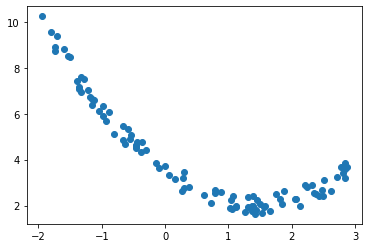

In [53]:
m = 100 
x1= 5 * np.random.rand(m,1) - 2
x2= 0.7 * x1 ** 2 -2 *x1 +3 + np.random.rand(m,1)


plt.scatter(x1,x2)
plt.show()


In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

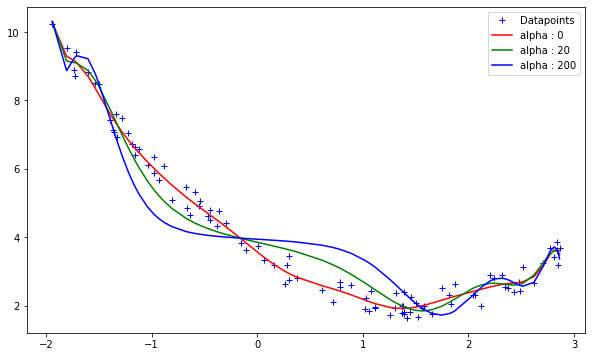

In [56]:
def get_pred_ridges(x1,x2,alpha):
    model =Pipeline([
        ('poly_feats',PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha = alpha))
    ])
    
    model.fit(x1,x2)
    return model.predict(x1)

alphas = [0,20,200]
cs = ['r','g','b']
plt.figure(figsize=(10,6))
plt.plot(x1,x2 , 'b+' , label = 'Datapoints')

for alpha, c in zip(alphas ,cs):
    preds = get_pred_ridges(x1,x2,alpha)
    
    plt.plot(sorted(x1[:,0]) , preds[np.argsort(x1[:,0])] , c, label = 'alpha : {}'.format(alpha))
    
plt.legend()
plt.show()